<a href="https://colab.research.google.com/github/Pam-Pam29/Probability-Distributions-Bayesian-Probability-and-Gradient-Descent-Implementation-Group_19/blob/main/Probability_Distributions%2C_Bayesian_Probability%2C_and_Gradient_Descent_Implementation_Group_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is the Poisson Distribution?**

The Poisson distribution is a discrete probability distribution that models the number of events occurring in a fixed interval of time or space, given that these events occur with a known constant mean rate and independently of the time since the last event.

*Think of it like counting*:

How many phone calls you get per hour

How many cars pass by per minute

How many defects appear in products

**Key Formula:**

P(X = k) = (λ^k × e^(-λ)) / k!

Where:

P(X = k) = probability of exactly k events occurring

λ (lambda) = average rate of occurrence (mean)

e = Euler's number (≈ 2.71828)

k = actual number of events (0, 1, 2, 3, ...)

k! = factorial of k


**When to Use Poisson Distribution**

1. You're counting rare events that happen randomly

2. Events don't affect each other (one event doesn't make another more likely)

3. The average rate stays the same

4. Only one event can happen at exactly the same moment


**How to Use Poisson Distribution**

Identify λ: Determine the average rate of occurrence

Define the interval: Specify the time/space period

Apply the formula: Calculate probabilities for different values of k

Interpret results: Understand what the probabilities mean in context

**Problem Scenario**

In remote and hybrid learning environments, understanding student engagement can be valuable for improving class interaction and participation strategies. One observable form of this engagement is how often students interact in the classroom chat during a live session.
For this project, we analyzed a real transcript from an online class. The transcript contains timestamped chat entries from students over the course of a 1 hour and 43 minute session (≈1.72 hours). The purpose is to model how often students engage during class time and predict future participation using a Poisson distribution.

Importantly, the instructor (Wakuma Tekalign Debela) was excluded from the data, as we are interested only in student interactions. After reviewing the transcript, we found that 12 unique students participated in the chat.

This setup is ideal for Poisson modeling, which describes the probability of a number of events (in this case, student messages) occurring within a fixed time window under the assumption that:


*   Events occur independently,
*   They happen at a constant average rate.

**Goal of the Analysis**

Given that 12 students interacted over ~1.72 hours, what’s the probability that 20 students will interact in a similar session that lasts just 1 hour?

**Transcipt Images**

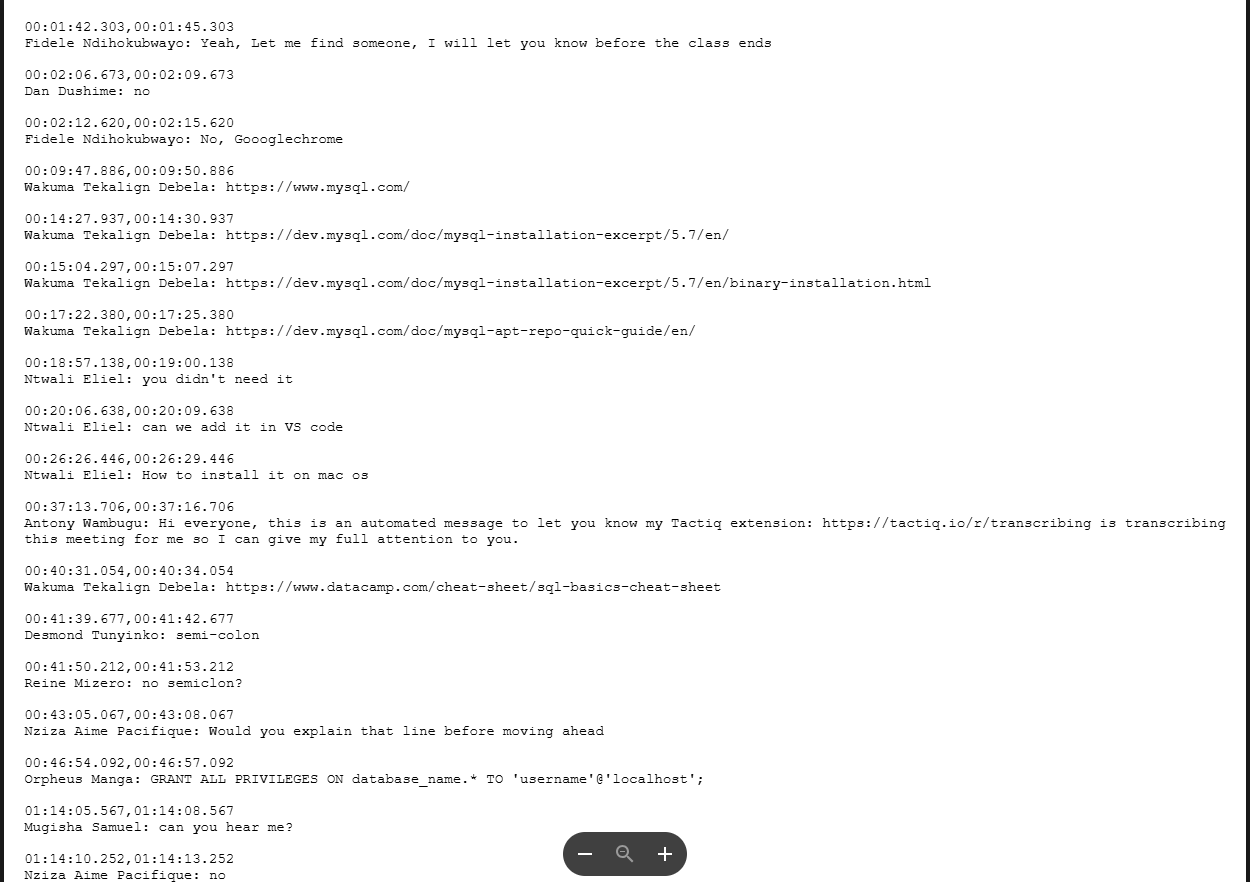





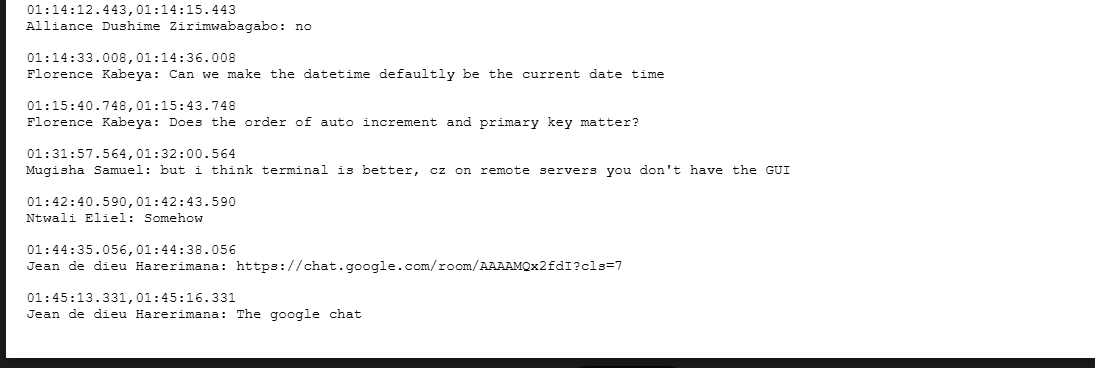


A university instructor monitors student participation during online class sessions. Over a recent recorded lecture lasting about 1 hour and 43 minutes, 12 unique students actively participated in the chat by asking questions or making comments.

Based on this observation, the instructor estimates that, on average, **about 7 student** messages occur per hour during the class.

Now, for the upcoming 1-hour session, the instructor wonders:

What is the probability that exactly 20 students will participate in the chat during the next 1-hour class?

In [2]:
# === Hardcoded Inputs ===
observed_students = 12     # from transcript (excluding teacher)
duration_hours = 1.72      # total class time in hours
target_k = 20              # number of students we want to predict for future
future_interval = 1        # in hours (1-hour class)

# === Helper Functions ===
def factorial(n):
  """Computes factorial"""
  f = 1
  for i in range(2,n+1):
    f *=i
  return f

def eul_approx(x,terms=55):
  """approximates e^x using a taylor series expansion"""
  eul = 0
  for n in range(terms):
    eul += (x ** n) / factorial(n)
  return eul

def poisson_probability(k, lambtha):
  """Computes Poisson probability using its formula i.e P(k; λ) = (e^-λ * λ^k) / k!"""
  e_neg_lambda = 1 / eul_approx(lambtha)
  numerator = (lambtha ** k) * e_neg_lambda
  denominator = factorial(k)
  return numerator / denominator

# === Main Logic ===
# Step 1: Estimate λ
lambda_estimate = (observed_students / duration_hours) * future_interval

# Step 2: Compute probability for target_k
prob_k = poisson_probability(target_k, lambda_estimate)

# === Display Results ===
print(f"Estimated λ = {lambda_estimate:.2f} interactions/hour")
print(f"Probability of exactly {target_k} interactions in 1 hour = {prob_k:.8f}")




Estimated λ = 6.98 interactions/hour
Probability of exactly 20 interactions in 1 hour = 0.00002864



**Part 2: Bayesian Probability**

*What is Bayesian Probability?*

Bayesian probability is a method of statistical inference that updates the probability of a hypothesis as more evidence becomes available. It's based on Bayes' theorem and represents a way of thinking about probability that incorporates prior knowledge.
You start with a hunch, find clues, then update your theory.


**The Formula**

P(A|B) = P(B|A) × P(A) / P(B)

Where:

P(A|B) = Posterior probability (probability of A given B)

P(B|A) = Likelihood (probability of B given A)

P(A) = Prior probability (initial belief about A)

P(B) = Marginal probability (total probability of B)


**Key Components Explained**

Prior Probability P(A): Your initial belief before seeing new evidence

Likelihood P(B|A): How likely the evidence is, given your hypothesis

Posterior Probability P(A|B): Updated belief after considering the evidence

Marginal Probability P(B): Total probability of observing the evidence

**When to Use Bayesian Probability**

Bayesian methods are particularly useful when:

1. You have prior knowledge about the problem
2. You want to update beliefs as new data arrives
3. Dealing with uncertainty and incomplete information
4. Sequential decision making is involved
5. Small sample sizes are available


QUESTION

A patient visits a doctor for a routine check-up. The patient is a long-term smoker, and the doctor is concerned about the possibility of lung cancer. Medical studies show that long-term smoking significantly increases the risk of developing lung cancer. Based on this, the doctor estimates that even before any medical tests are conducted, there is an 8% prior probability that this patient has lung cancer.

The doctor then orders a CT scan, which returns a positive result for signs of lung cancer. The CT scan has the following characteristics:
 If the patient has lung cancer, the scan detects it 90% of the time. If the patient does not have lung cancer, the scan incorrectly shows a positive result 5% of the time.

What is the probability that this patient has lung cancer after each positive test result.

In [ ]:
def compute_posterior(prior, likelihood, false_positive):
    prior_complement = 1 - prior
    evidence = (likelihood * prior) + (false_positive * prior_complement)
    posterior = (likelihood * prior) / evidence
    return posterior

if __name__ == "__main__":
    PRIOR = 0.08
    LIKELIHOOD = 0.90
    FALSE_POSITIVE = 0.05

    print(f"Initial prior probability: {PRIOR*100:.2f}%\n")
    print("Test 1:")
    print(f"  Prior probability: {PRIOR*100:.2f}%")
    print(f"  Likelihood (True Positive Rate): {LIKELIHOOD*100:.2f}%")
    print(f"  False Positive Rate: {FALSE_POSITIVE*100:.2f}%")

    posterior_after_test1 = compute_posterior(PRIOR, LIKELIHOOD, FALSE_POSITIVE)
    print(f"  Posterior probability after test 1: {posterior_after_test1*100:.2f}%")




Initial prior probability: 8.00%

Test 1:
  Prior probability: 8.00%
  Likelihood (True Positive Rate): 90.00%
  False Positive Rate: 5.00%
  Posterior probability after test 1: 61.02%
